POSITIVE - I am thrilled with the progress I’ve made; everything is going perfectly as planned!

In [1]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('usernew_interactions.db')  # Replace with your database name

# Load the data into a DataFrame
query = "SELECT * FROM all_metrics"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


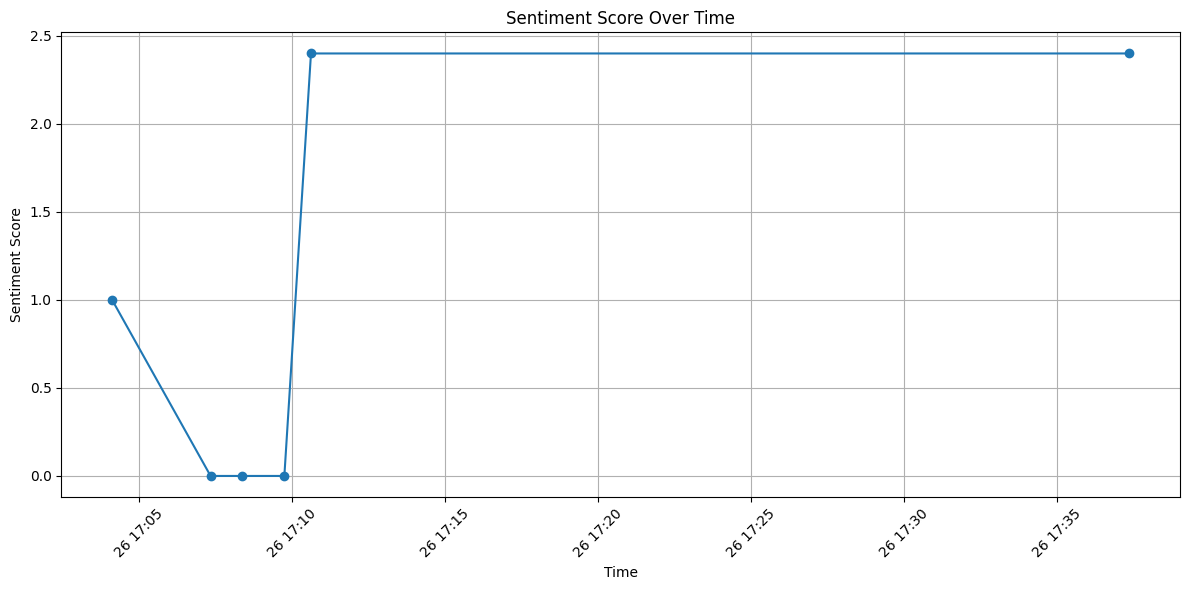

In [2]:
import matplotlib.pyplot as plt

# Convert the timestamp to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['sentiment_score'], marker='o')
plt.title('Sentiment Score Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


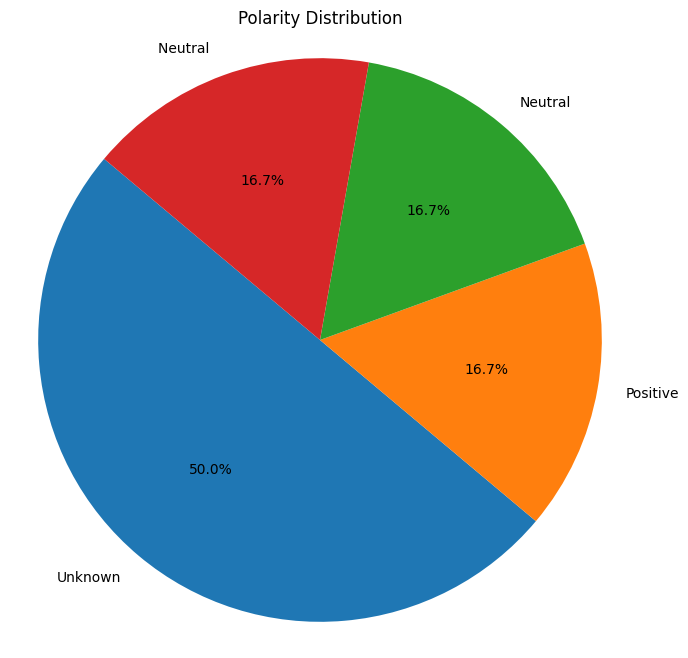

In [3]:
# Count the occurrences of each polarity
polarity_counts = df['polarity'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Polarity Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


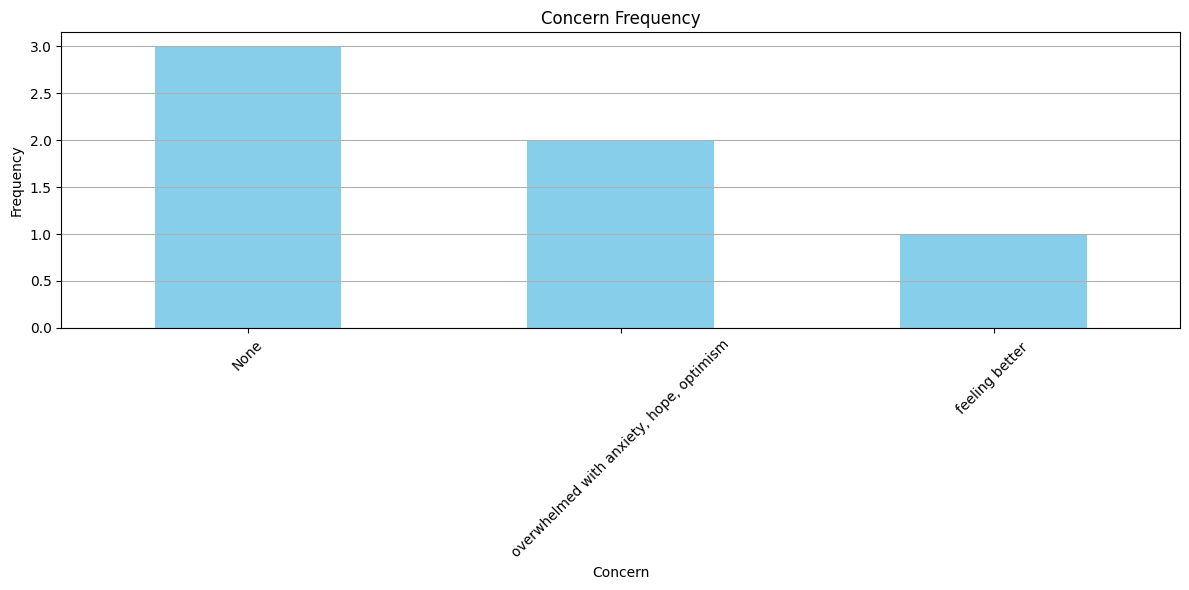

In [4]:
# Count the frequency of each concern
concern_counts = df['extracted_concern'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
concern_counts.plot(kind='bar', color='skyblue')
plt.title('Concern Frequency')
plt.xlabel('Concern')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\rahul\AppData\Local\Temp\ipykernel_9576\2497029283.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

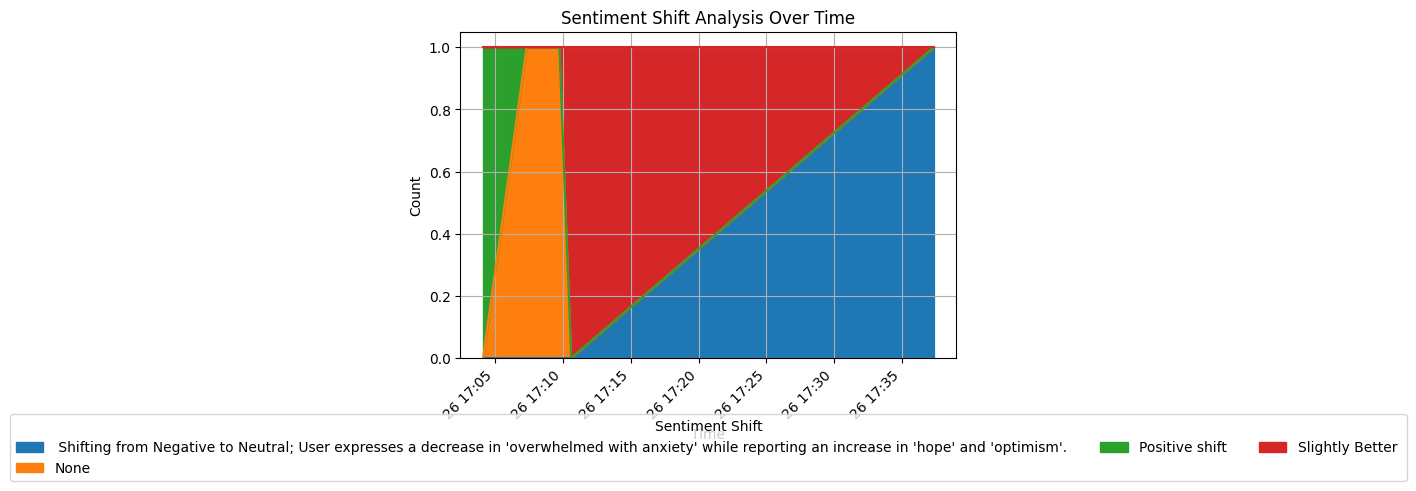

In [6]:
# Convert the timestamp to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by timestamp and sentiment shift
sentiment_shift_counts = df.groupby(['timestamp', 'sentiment_shift']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
ax = sentiment_shift_counts.plot(kind='area', stacked=True)

# Customize the legend
plt.title('Sentiment Shift Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()

# Move legend below the graph
plt.legend(title='Sentiment Shift', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

plt.tight_layout()
plt.show()

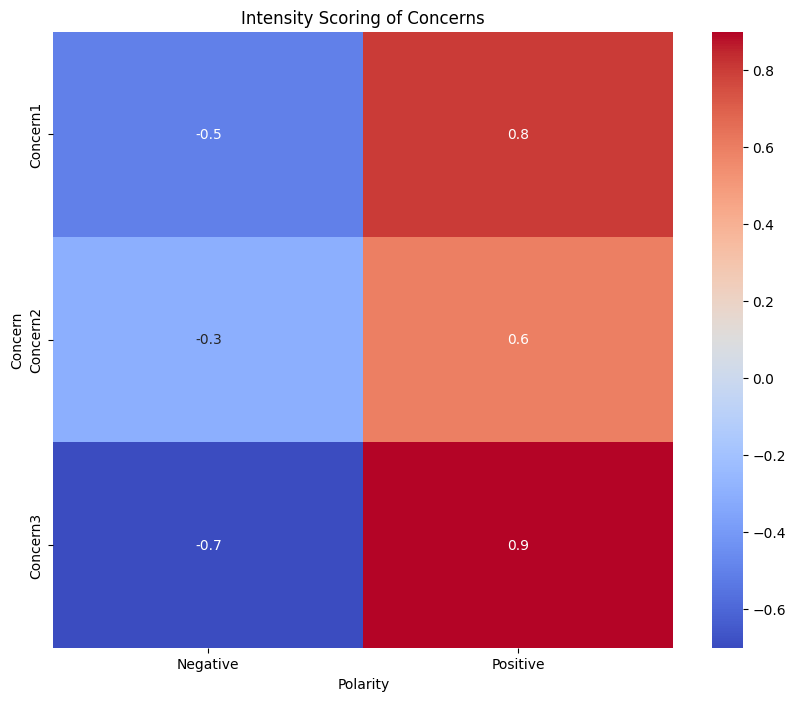

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame with fake data
data = {
    'extracted_concern': ['Concern1', 'Concern1', 'Concern2', 'Concern2', 'Concern3', 'Concern3'],
    'polarity': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative'],
    'sentiment_score': [0.8, -0.5, 0.6, -0.3, 0.9, -0.7]
}

df = pd.DataFrame(data)

# Pivot the data to create a matrix for the heatmap
heatmap_data = df.pivot_table(values='sentiment_score', index='extracted_concern', columns='polarity', aggfunc='mean')

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Intensity Scoring of Concerns')
plt.xlabel('Polarity')
plt.ylabel('Concern')
plt.show()

In [9]:
from flask import Flask, request, jsonify
from transformers import pipeline

app = Flask(__name__)
nlp_model = pipeline("conversational", model="microsoft/DialoGPT-small")

@app.route('/generate_response', methods=['POST'])
def generate_response():
    user_input = request.json['text']
    response = nlp_model(user_input)[0]['generated_text']
    return jsonify({'response': response})

if __name__ == '__main__':
    app.run(port=5000)


config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rahul\.cache\huggingface\hub\models--microsoft--DialoGPT-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


KeyError: "Unknown task conversational, available tasks are ['audio-classification', 'automatic-speech-recognition', 'depth-estimation', 'document-question-answering', 'feature-extraction', 'fill-mask', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-to-image', 'image-to-text', 'mask-generation', 'ner', 'object-detection', 'question-answering', 'sentiment-analysis', 'summarization', 'table-question-answering', 'text-classification', 'text-generation', 'text-to-audio', 'text-to-speech', 'text2text-generation', 'token-classification', 'translation', 'video-classification', 'visual-question-answering', 'vqa', 'zero-shot-audio-classification', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-object-detection', 'translation_XX_to_YY']"